# Comparative analysis of divergent association scores in humans and GPT-3.5 turbo and GPT-4

## dependencies

In [1]:
import sys
sys.path.append('..') 
import numpy as np
from scripts.multiple_test import analyze_results, create_heatmap, most_common_words, create_bar_plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import ast
warnings.filterwarnings('ignore')

In [2]:
colors = {'GPT-3_low_DAT': '#FDB813',
          'GPT-3_mid_DAT':'#EF6C00',
          'GPT-3_high_DAT': '#D32F2F',
          'GPT-3_low_control': '#EEE8AA',
          'GPT-3_mid_control': '#FFE082',
          'GPT-3_high_control':'#FFAB91',
          'GPT-4_low_DAT':'#00B7C3',
          'GPT-4_mid_DAT':'#3F51B5',
          'GPT-4_high_DAT':'#9C27B0',
          'GPT-4_low_control':'#80DEEA',
          'GPT-4_mid_control':'#8C9EFF',
          'GPT-4_high_control':'#CE93D8',
          'Human (8k)':'black',
          'Human (100k)':'darkgrey',
          'GPT-3_mid_ety': '#26A69A',
          'GPT-3_mid_thes': '#D81B60',
          'GPT-3_mid_opp': '#FFD700',  # goldenrod
          'GPT-3_mid_rnd':'#7E57C2',
          'GPT-4_mid_ety': '#1A7466',
          'GPT-4_mid_thes': '#A51645',
          'GPT-4_mid_opp': '#BBA600',
          'GPT-4_mid_rnd':'#4A3280',
          'Bard_mid_DAT':'peru',
          'Bard_mid_control':'#DEC3A3',
          'Claude_low_DAT':'#FDB813',
          'Claude_mid_DAT':'teal',
          'Claude_high_DAT':'#D32F2F',
          'Claude_mid_control':'#1ACCCC',
          'Pythia_mid_DAT':'#603080',
          'Pythia_mid_control':'#BF9FDF',
          'StableLM_mid_DAT':'darkgreen',
          'StableLM_mid_control':'#80FF80',
          'StableLMoass_mid_DAT':'deeppink',
          'StableLMoass_mid_control':'pink',
          'RedPajama_mid_DAT':'#FF0000',
          'RedPajama_mid_control':'#FF8080',
          'Vicuna_mid_DAT':'#7BC8F6',
          'Vicuna_mid_control':'#ADD8E6',
          'Vicuna_mid_ety':'#7BC8F6',}

## Load all machine and human data

In [3]:
results_df = pd.read_csv('../scripts/concatenated_results.csv')

## Get top 3 words

In [4]:
import pandas as pd

# Assuming df is your dataframe
filtered_df = results_df[
    (results_df['Model'] == 'GPT-4') & 
    (results_df['Control'] == 'Original instructions') &
    (results_df['Strategy'] == 'Original instructions') 
]

# Filter and get top 3 lists for each temperature level
top_3_low = filtered_df[filtered_df['Temperature'] == 'Low'].nlargest(3, 'Score')
top_3_mid = filtered_df[filtered_df['Temperature'] == 'Mid'].nlargest(3, 'Score')
top_3_high = filtered_df[filtered_df['Temperature'] == 'High'].nlargest(3, 'Score')

# Concatenate the results
result = pd.concat([top_3_low, top_3_mid, top_3_high])

# Prepare the formatted text
formatted_text = ""

for index, row in result.iterrows():
    formatted_text += "Temperature: {}\n".format(row['Temperature'])
    formatted_text += "Score: {}\n".format(row['Score'])
    words = row['Words']
    formatted_text += "Words: {}\n\n------\n".format(", ".join(words))

# Save the formatted text to a file
with open('top_word_lists.txt', 'w') as file:
    file.write(formatted_text)


# 2. Quality control manipulations
## Most common words in humans

In [5]:
import pandas as pd
import collections

#load DAT Olson's data
filename = "../human_data_dat/study2.tsv"

# read the data into a DataFrame
df_human = pd.read_csv(filename, sep='\t')

n_words = 5  # Set the number of most common words to find

# Concatenate all the words from columns 'word.1' to 'word.10'
all_words = df_human.loc[:, 'word.1':'word.10'].values.flatten()

# Count the occurrences of each word
word_counter = collections.Counter(all_words)

# Find the n most common words
most_common_words_humans = word_counter.most_common(n_words)

# Calculate the percentage of occurrences for each of the n most common words
total_words = len(all_words)
most_common_words_percentage = [(word, count / total_words * 1000) for word, count in most_common_words_humans]

# Print the n most common words with their percentages
print(f"Top {n_words} most common words with their percentage of occurrence:")
for word, percentage in most_common_words_percentage:
    print(f"{word}: {percentage:.2f}%")



'''car      1000000 13820   1.38
dog      1000000 12394   1.24
tree     1000000 10199   1.02
cat      1000000  7904   0.790
book     1000000  7035   0.704
house    1000000  6171   0.617
water    1000000  5651   0.565
mountain 1000000  5649   0.565
computer 1000000  5216   0.522
cloud    1000000  4959   0.496'''



Top 5 most common words with their percentage of occurrence:
Car: 11.68%
Tree: 9.40%
Dog: 8.38%
car: 8.03%
Book: 6.44%


'car      1000000 13820   1.38\ndog      1000000 12394   1.24\ntree     1000000 10199   1.02\ncat      1000000  7904   0.790\nbook     1000000  7035   0.704\nhouse    1000000  6171   0.617\nwater    1000000  5651   0.565\nmountain 1000000  5649   0.565\ncomputer 1000000  5216   0.522\ncloud    1000000  4959   0.496'

## Word counts

[[('volcano', 39.442231075697215), ('elephant', 60.95617529880478), ('microscope', 65.73705179282868)], [('Tree', 10.2), ('Dog', 12.4), ('Car', 13.8)], [], [('lamp', 61.9), ('butterfly', 70.1), ('river', 75.5)], [('ocean', 26.448736998514118), ('computer', 28.52897473997028), ('elephant', 36.84992570579495)], [('love', 49.75073761318547), ('ocean', 50.361176111506765), ('chair', 57.482958591921864)], [('car', 7.389162561576354), ('flower', 7.389162561576354), ('tree', 14.309171944639926)], [('aardvark', 4.930779442442633), ('abyss', 5.120424805613504), ('able', 5.120424805613504)], [('happy', 9.524806363826668), ('love', 11.513502198032239), ('bright', 19.991626543855975)], [('hate', 29.773366908606135), ('love', 30.365871722707748), ('hope', 30.662124129758556)]]


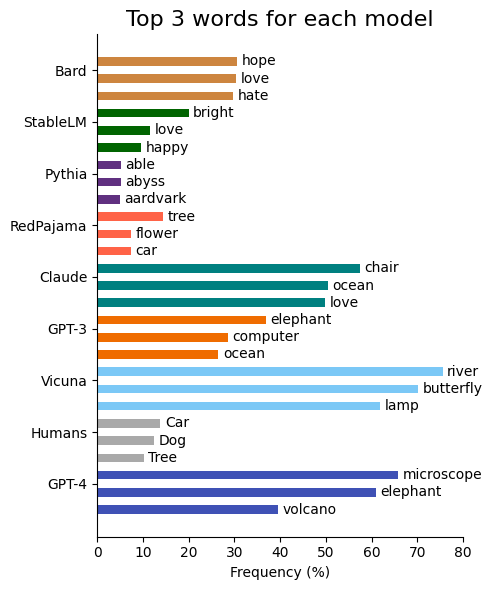

In [4]:
colors_ = {
    
    'GPT-4': '#3F51B5',
    'Humans': 'darkgrey',
    'Vicuna': '#7BC8F6',
    'GPT-3': '#EF6C00',
    'Claude': 'teal',
    'RedPajama': 'tomato',
    'Pythia': '#603080',
    'StableLM': 'darkgreen',
    'Bard': 'peru',
    
}

# Add the human data
human_data = [("Tree", 10.2), ("Dog", 12.4), ("Car", 13.8)]
model_word_counts = []

# Assuming results_df is already loaded
model_names = list(colors_.keys())

n_words = 3

# Iterate over all models and accumulate the word counts
for model_name in model_names:  # Exclude the last model_name, "Human"
    temp = 'Mid'
    strategy = 'Original instructions'

    df = results_df.loc[(results_df['Model'] == model_name) & (results_df['Strategy'] == strategy) &
                        (results_df['Temperature'] == temp)].dropna()

    all_words = df['Words'].tolist()
    n_lists = len(all_words)

    # Initialize an empty list to hold all words
    all_words_flat = []

    # Iterate over each string representation of a list
    for string_list in all_words:
        try:
            # Safely evaluate the string as a list
            actual_list = ast.literal_eval(string_list)
            # Extend the flat list with the actual list
            all_words_flat.extend(actual_list)
        except ValueError:
            # Handle the case where the string cannot be evaluated as a list
            print(f"Could not evaluate: {string_list}")
    all_words = all_words_flat
    word_counts = most_common_words(all_words, n_words)
    word_counts_percentage = [(word, count / len(all_words) * 10 * 100) for word, count in word_counts]
    model_word_counts.append(sorted(word_counts_percentage, key=lambda x: x[1], reverse=False))

# Add the human data to model_word_counts at the beginning
model_word_counts.insert(1, human_data)
#model_word_counts.append(human_data)
print(model_word_counts)
#remove empty lists
model_word_counts = [x for x in model_word_counts if x != []]
# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(5, 6))

bar_width = 0.50
bar_positions = [i for i in range(n_words * len(model_names))]

for i, (model_name, word_counts) in enumerate(zip(model_names, model_word_counts)):
    word_labels, counts = zip(*word_counts)
    for j, (word, count) in enumerate(zip(word_labels, counts)):
        ax.barh(bar_positions[i * n_words + j], count, bar_width, color=colors_[model_name])
        ax.text(count + 1, bar_positions[i * n_words + j], word, va='center')
# set model names
ax.set_yticks([(i * n_words) + n_words / 2 for i in range(len(model_names))])
ax.set_yticklabels(model_names)
# axes names
ax.set_xlabel('Frequency (%)')
ax.set_title('Top 3 words for each model', fontsize=16)
ax.set_xlim(0, 80)
# remove box frame
ax.spines['top'].set_visible(False)
# remove right frame
ax.spines['right'].set_visible(False)
plt.tight_layout()

# Save the plot
plt.savefig(f"{'_'.join(model_names)}_top{n_words}_words_percentage_final_new_vicuna.png", dpi=300)

# Show the plot
plt.show()


## Top words for specific temperature level

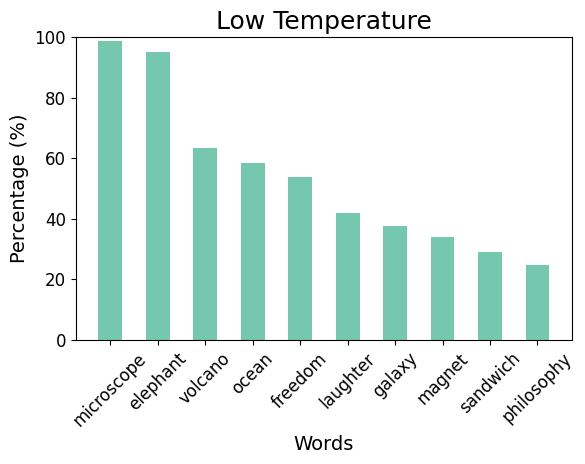

In [5]:
modelname = 'GPT-4'
temp = 'Low'
strategy = 'Original instructions'
palette = sns.color_palette("Set2", 1)
n_words = 10

df = results_df.loc[(results_df['Model']==modelname) & (results_df['Strategy']==strategy ) &
                    ((results_df['Temperature']==temp))].dropna()

# Use ast.literal_eval to safely evaluate the string representation of a list into an actual list
all_words_lists = [ast.literal_eval(word_list) for word_list in df['Words'].dropna()]

# Now flatten the list of lists
all_words = [word for sublist in all_words_lists for word in sublist]

# Now create the bar plot
create_bar_plot(most_common_words(all_words, n_words), n_lists=len(all_words_lists), ylim=(0, 100), alpha=0.9, palette_name=palette,
                save=False, modelname=modelname, temp=temp, strategy=strategy, title='Low Temperature')

# 3. Main analyses
## Overall differences between human and machines
figure 1

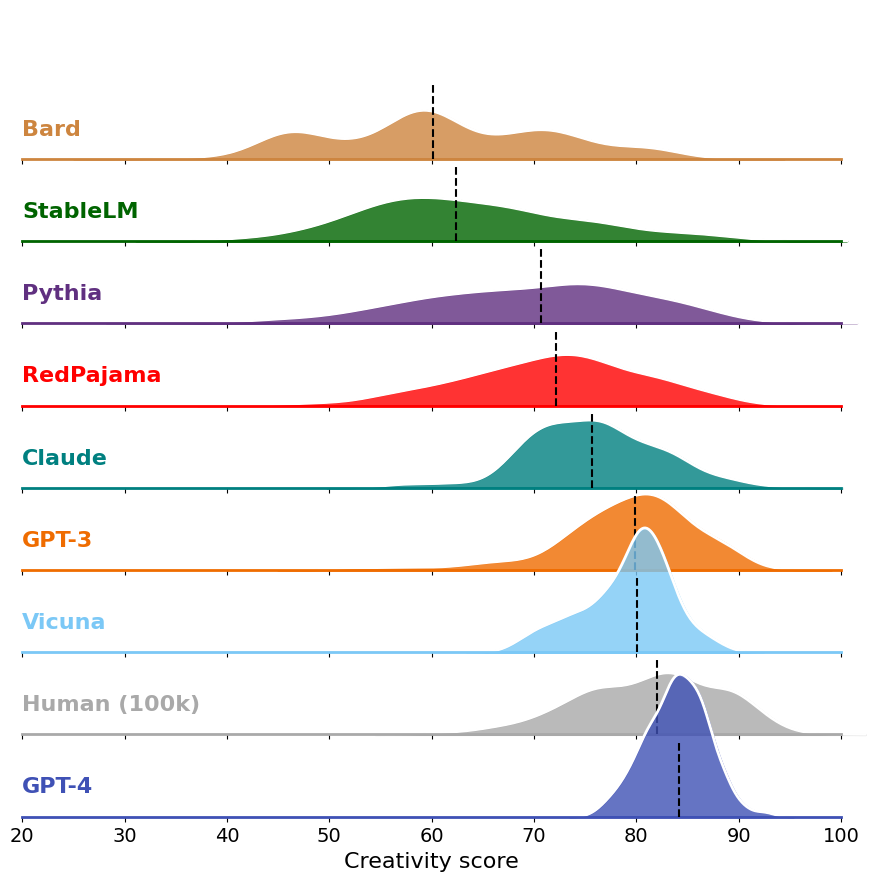

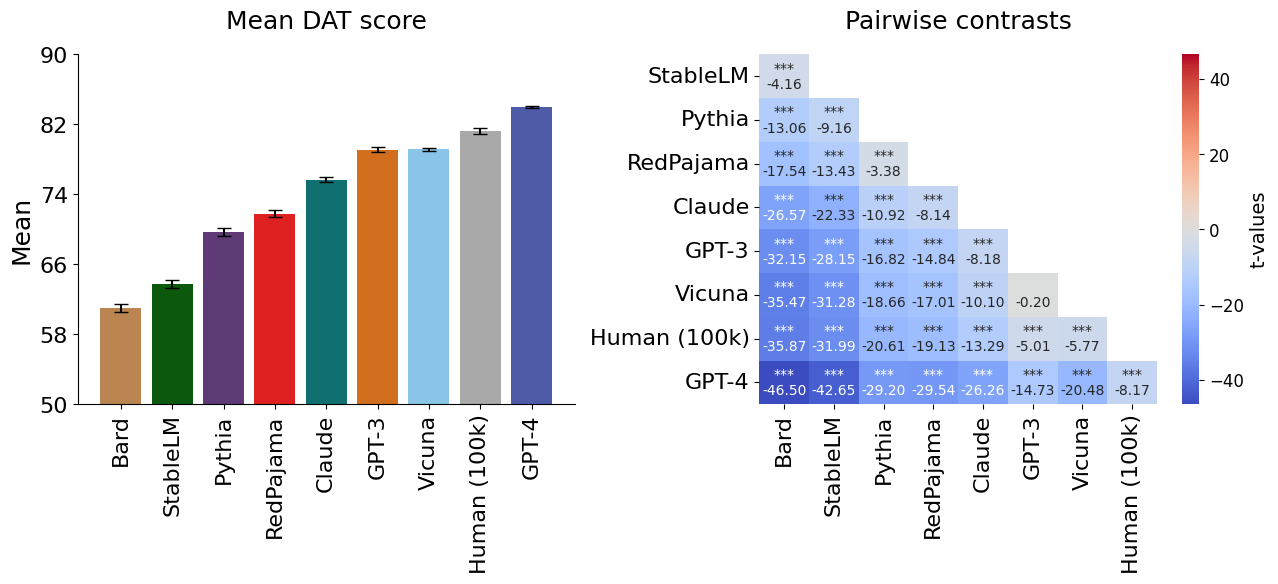

In [17]:
# Initialize the FacetGrid object
pal = [colors['GPT-3_mid_DAT'],
       colors['GPT-4_mid_DAT'],
       colors['Claude_mid_DAT'],
       colors['StableLM_mid_DAT'],
       colors['Human (100k)'],
       colors['Bard_mid_DAT'],
       colors['RedPajama_mid_DAT'],
       colors['Pythia_mid_DAT'],
       colors['Vicuna_mid_DAT']]
order = ['Bard', 'StableLM', 'Pythia', 'RedPajama', 'Claude', 'GPT-3', 'Vicuna', 'Human (100k)', 'GPT-4']
pal_order = [pal[5], pal[3], pal[7], pal[6], pal[2], pal[0], pal[8], pal[4], pal[1]]
df = results_df.loc[(results_df['Strategy']=='Original instructions') &
                    (results_df['Temperature']=='Mid') | (results_df['Temperature'].isnull())]

df = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Model').apply(lambda x: x.sample(min(len(x), 500), random_state=32)).reset_index(drop=True)

g = sns.FacetGrid(df, row="Model", hue="Model", aspect=9, height=1, row_order=order, palette=pal_order, hue_order=order)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "Score")
mean_conf, pvals, tvals = analyze_results(df, 'Model', order)
# Add vertical lines for mean and confidence intervals
for ax, model in zip(g.axes.flat, order):
    if model == 'Human (8k)':
        print(mean_conf[mean_conf['Model'] == model]['median'])
        ax.axvline(mean_conf[mean_conf['Model'] == model]['median'].values[0], color='white', linestyle='--', ymin=0, ymax=0.5)
    else:
        ax.axvline(mean_conf[mean_conf['Model'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(20, 100))
g.savefig('DAT_LLMs_humans_ridge_median_new_vicuna')
create_heatmap(mean_conf, 'Model', tvals_table=tvals, pvals_table=pvals,
               pal=[pal[5], pal[3], pal[7], pal[6], pal[2], pal[0], pal[8], pal[4], pal[1]], order=order, xlim=(50,90), save='DAT_GPT_humans_models_final_new_vicuna', large=(13, 6))

#### Smaller figure for grant application

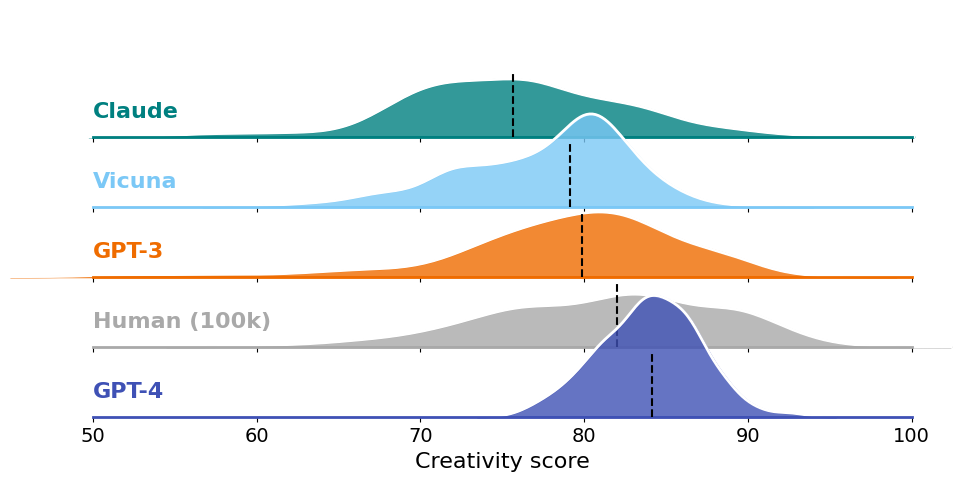

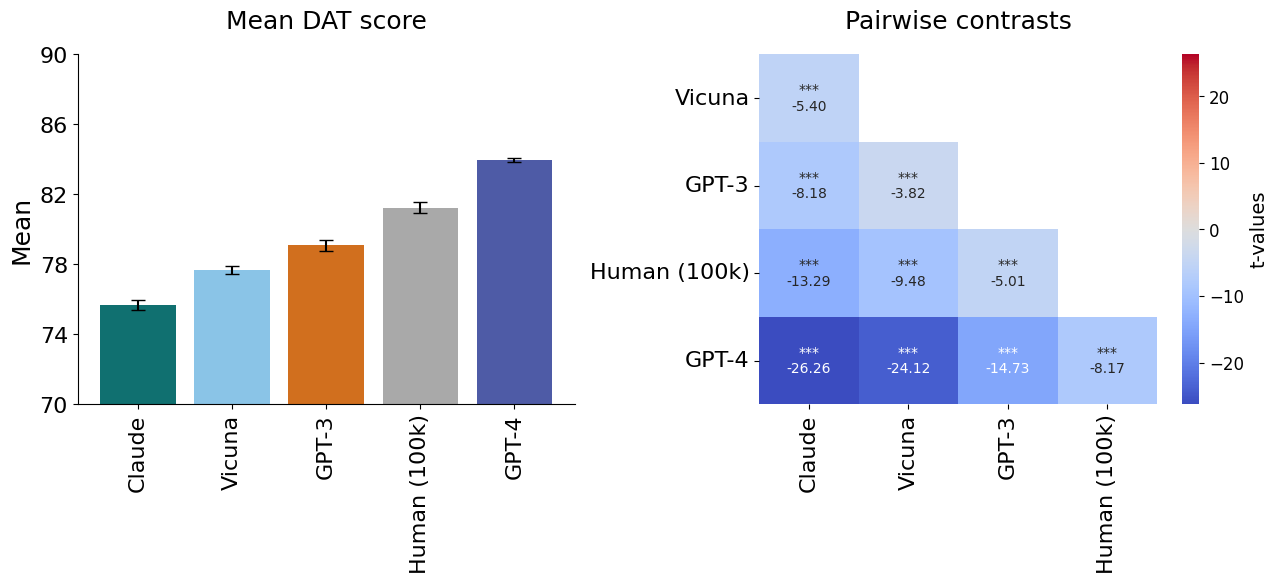

In [20]:
# Initialize the FacetGrid object
pal = [colors['GPT-3_mid_DAT'],
       colors['GPT-4_mid_DAT'],
       colors['Claude_mid_DAT'],
       colors['Human (100k)'],
       colors['Vicuna_mid_DAT']]
order = ['Claude', 'Vicuna', 'GPT-3', 'Human (100k)', 'GPT-4']
pal_order = [pal[2], pal[4], pal[0], pal[3], pal[1]]
df = results_df.loc[(results_df['Strategy']=='Original instructions') &
                    (results_df['Temperature']=='Mid') | (results_df['Temperature'].isnull())]

df = df.groupby('Model').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Model').apply(lambda x: x.sample(min(len(x), 500), random_state=32)).reset_index(drop=True)

g = sns.FacetGrid(df, row="Model", hue="Model", aspect=9, height=1, row_order=order, palette=pal_order, hue_order=order)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "Score")
mean_conf, pvals, tvals = analyze_results(df, 'Model', order)
# Add vertical lines for mean and confidence intervals
for ax, model in zip(g.axes.flat, order):
    if model == 'Human (8k)':
        print(mean_conf[mean_conf['Model'] == model]['median'])
        ax.axvline(mean_conf[mean_conf['Model'] == model]['median'].values[0], color='white', linestyle='--', ymin=0, ymax=0.5)
    else:
        ax.axvline(mean_conf[mean_conf['Model'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(50, 100))
g.savefig('DAT_LLMs_humans_ridge_grant')
create_heatmap(mean_conf, 'Model', tvals_table=tvals, pvals_table=pvals,
               pal=[pal[2], pal[4], pal[0], pal[3], pal[1]], order=order, xlim=(70,90), save='DAT_GPT_humans_models_grant', large=(13, 6))

## Control vs DAT
figure 2

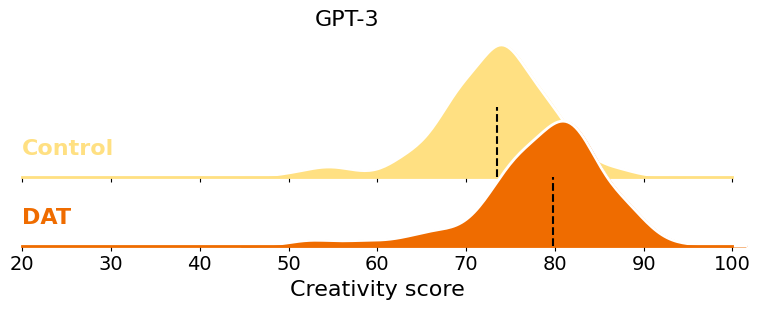

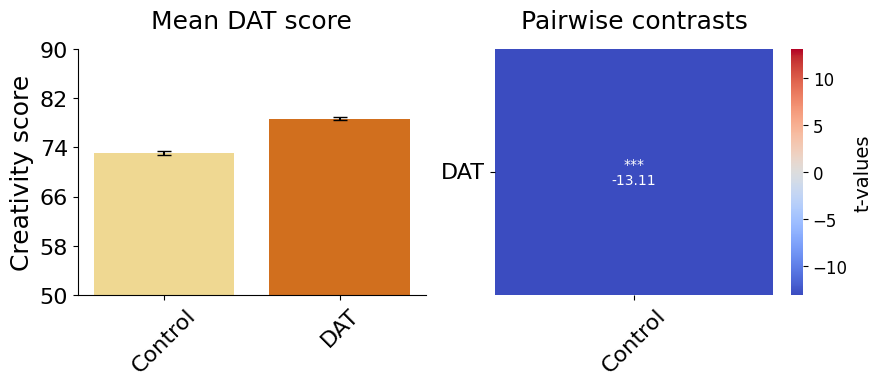

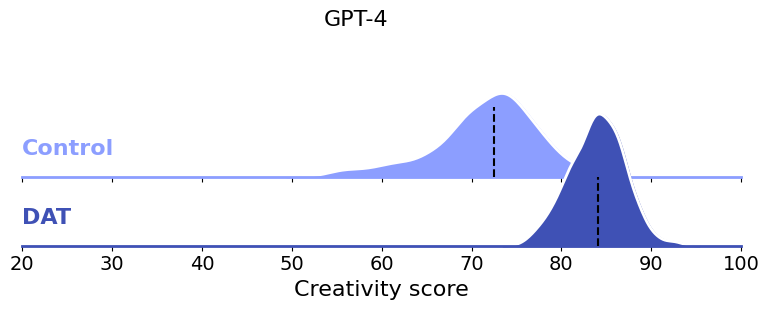

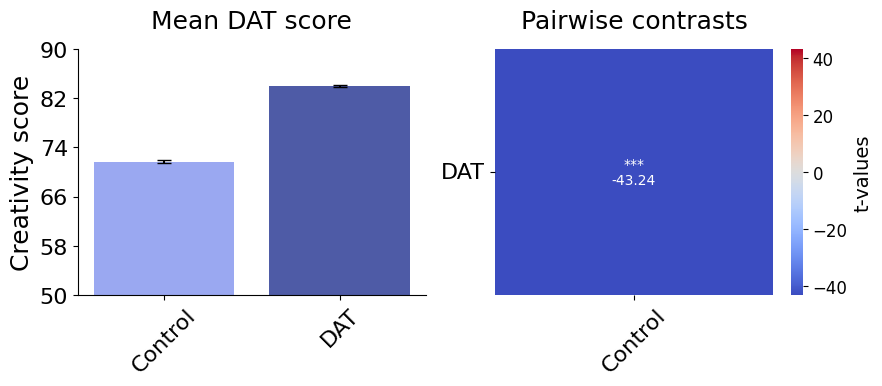

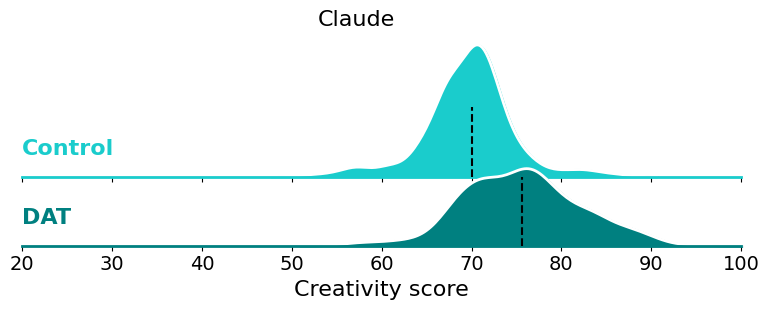

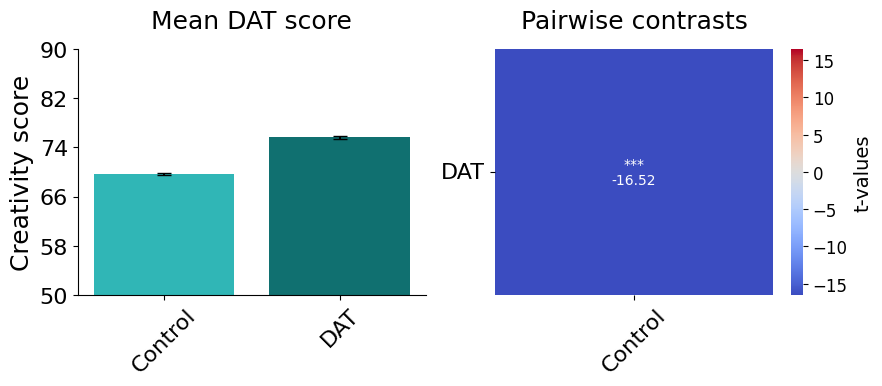

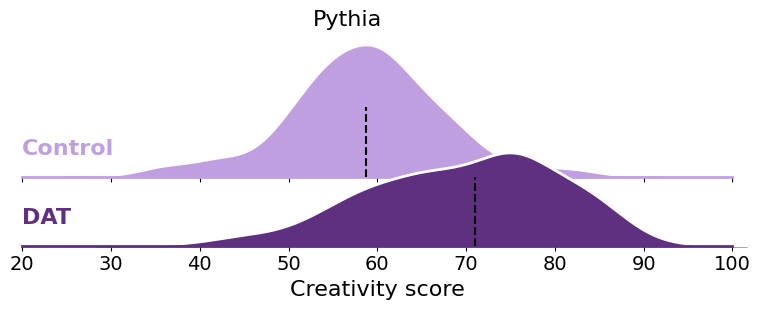

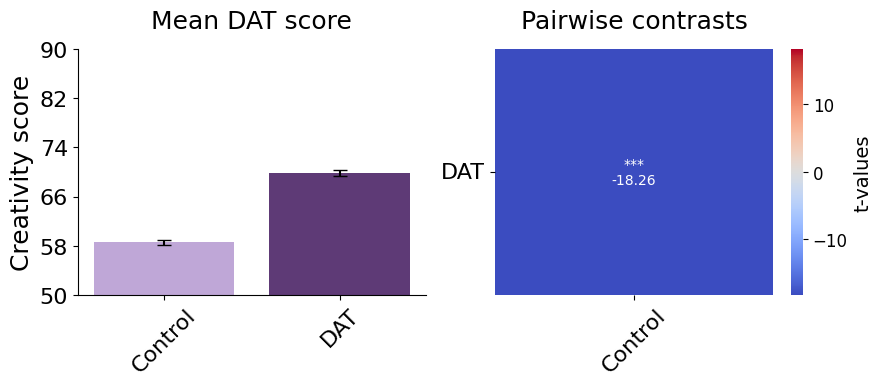

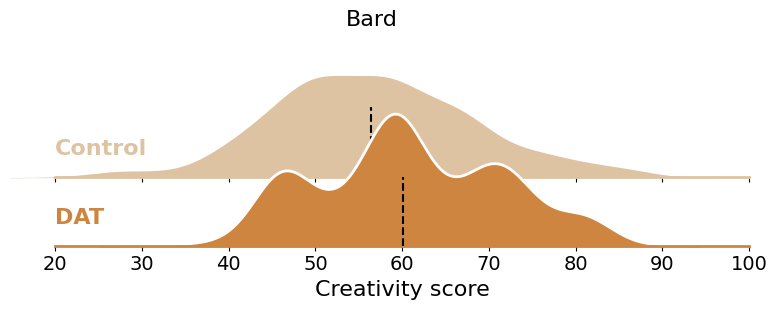

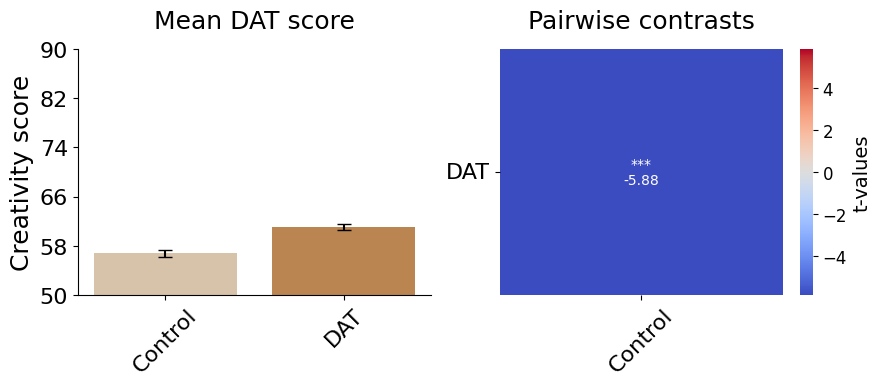

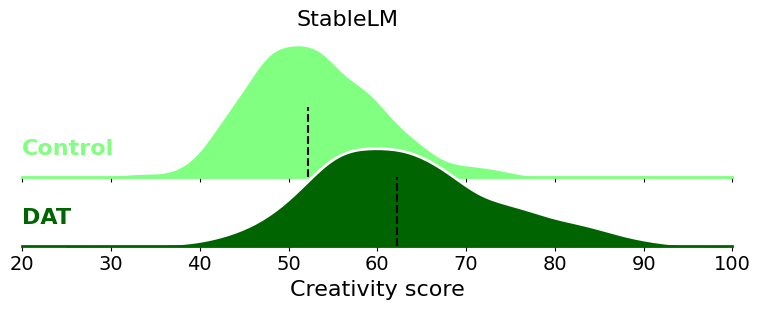

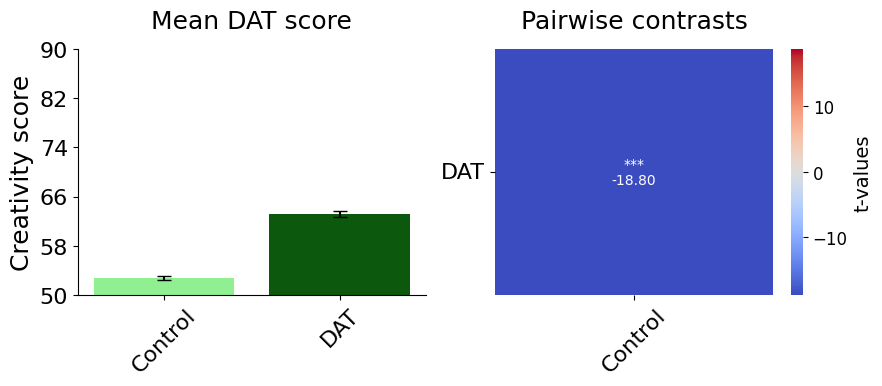

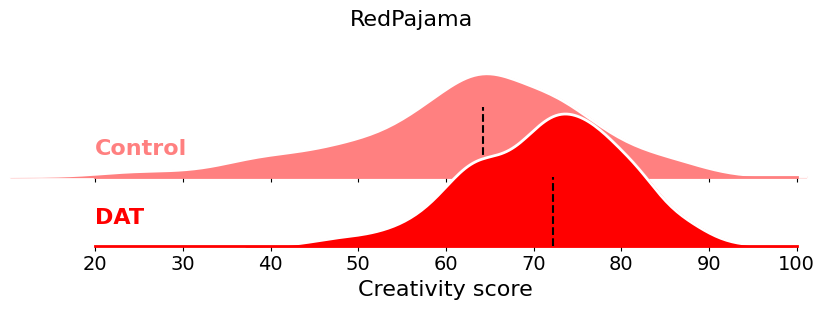

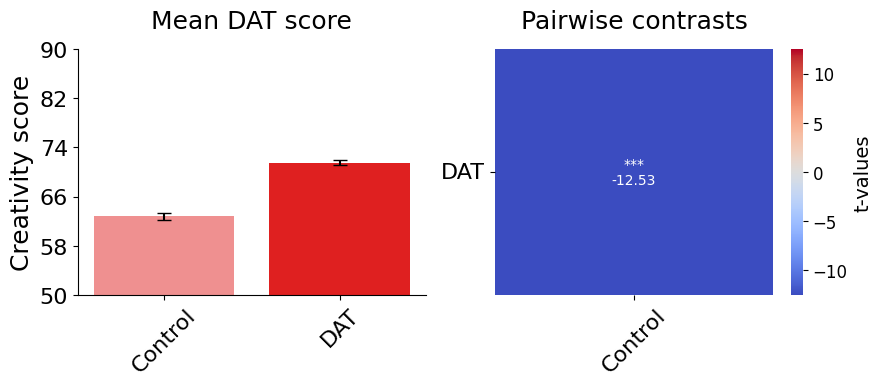

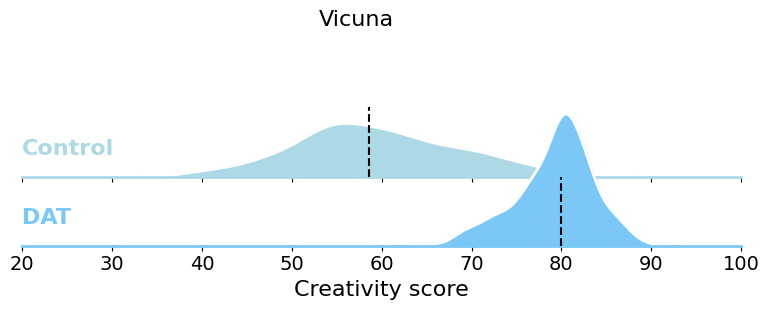

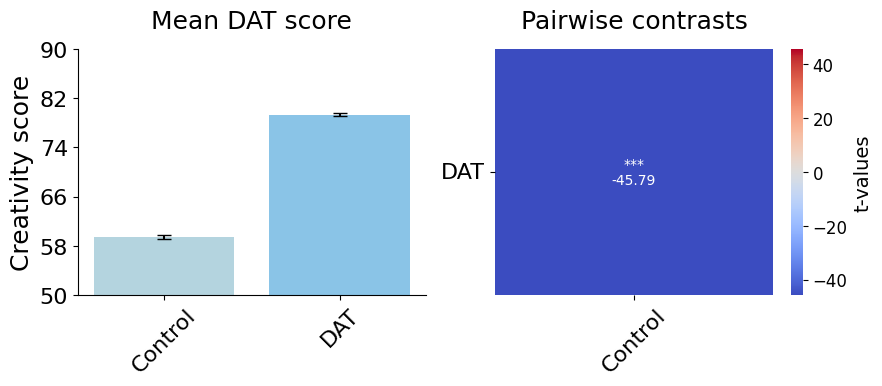

In [18]:
#from multiple_test import *
list_of_dfs = [results_df.loc[(results_df['Model']=='GPT-3') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='GPT-4') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='Claude') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='Pythia') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='Bard') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='StableLM') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='RedPajama') &
                              (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],
               results_df.loc[(results_df['Model']=='Vicuna') &
                               (results_df['Temperature']=='Mid') &
                              (results_df['Control']!='Strategy')],]

for e, df in enumerate(list_of_dfs):
      gpt = df["Model"].unique()[0]
      # Remove observations with more or less than 3 std, and then randomly sample up to 500 observations
      df['Control'] = df['Control'].replace({'Original instructions': 'DAT'})
      df = df.groupby('Control').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
      df = df.groupby('Control').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
            

      # Initialize the FacetGrid object
      pal = [colors[f'{gpt}_mid_DAT'], colors[f'{gpt}_mid_control']]
      order = ['Control', 'DAT']


      g = sns.FacetGrid(df, row="Control", hue="Control", aspect=9, height=1, palette=[pal[1], pal[0]], row_order=order)
      # set figure size
      g.fig.set_size_inches(8, 3)
      
      # make transparent background
      for ax in g.axes.flat:
            ax.set_facecolor('none')
      # Draw the densities in a few steps
      g.map(sns.kdeplot, "Score",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

      # txt = f"{label} ({len(df.loc[df['Control']==label])})"
      # Define and use a simple function to label the plot in axes coordinates
      def label(x, color, label):
            ax = plt.gca()
            txt = f"{label}"
            ax.text(0, .2, txt, fontweight="bold", color=color,
                        ha="left", va="center", transform=ax.transAxes,fontsize=16)
      # change title from the FaceGrid object
      #g.set_titles("Stable LM")
      g.map(label, "Score")
      # increase title size
      g.set_titles(fontsize=16)
      mean_conf, pvals, tvals = analyze_results(df, 'Control', order=order)
      #print(mean_conf)
      # Add vertical lines for mean and confidence intervals
      for ax, model in zip(g.axes.flat, [0,1]):
            ax.axvline(mean_conf['median'][model], color='black', linestyle='--', ymin=0, ymax=0.5)
      # Set the subplots to overlap
      for ax in g.axes.flat:
            ax.set_xlabel('Creativity score', fontsize=16)
            for label in ax.get_xticklabels():
                  label.set_fontsize(14)
      g.figure.subplots_adjust(hspace=-.50)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      # set the main title of the figure
      
      g.set(yticks=[], ylabel="")
      g.despine(bottom=True, left=True)
      g.set(xlim=(20, 100))
      g.fig.suptitle(df['Model'].unique()[0], fontsize=16)
      g.fig.suptitle(gpt, fontsize=16)
      #g.savefig('DAT_GPT_control_new_vicuna_kde_{}'.format(str(e)), dpi=300)
      create_heatmap(mean_conf, 'Control', tvals_table=tvals, pvals_table=pvals, pal=reversed(pal), order=['Control', 'DAT'], 
                     save='DAT_GPT_control_test{}'.format(str(e)), large=(9, 4), xlim=(50,90), rotation=45, axis_name='Creativity score')

## Injecting strategies

In [6]:
def get_palette(model, order):
    color_map = {
        'GPT-3': {
            'Etymology': colors['GPT-3_mid_ety'],
            'DAT': colors['GPT-3_mid_DAT'],
            'Control': colors['GPT-3_mid_control'],
            'Opposition': colors['GPT-3_mid_opp'],
            'Random': colors['GPT-3_mid_rnd'],
            'Thesaurus': colors['GPT-3_mid_thes']
        },
        'GPT-4': {
            'Etymology': colors['GPT-4_mid_ety'],
            'Control': colors['GPT-4_mid_control'],
            'DAT': colors['GPT-4_mid_DAT'],
            'Opposition': colors['GPT-4_mid_opp'],
            'Thesaurus': colors['GPT-4_mid_thes']
        },
        'Vicuna': {
            'Etymology': colors['Vicuna_mid_ety'],
            'Control': colors['Vicuna_mid_control'],
            'DAT': colors['Vicuna_mid_DAT'],
        }
    }

    return [color_map[model][strategy] for strategy in order]


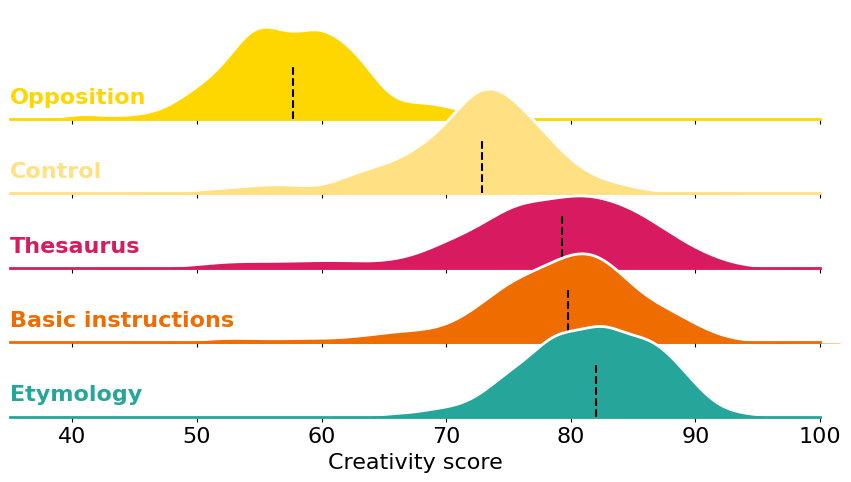

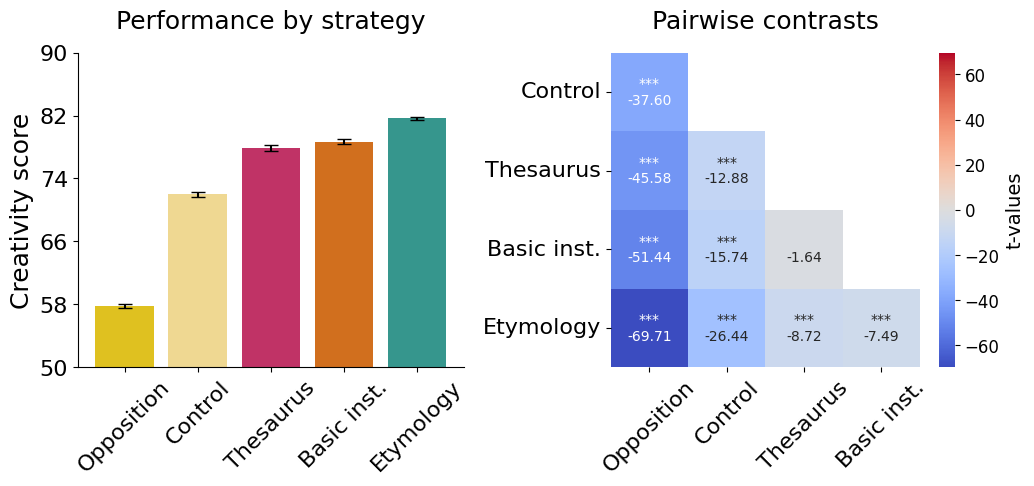

In [7]:
###PLOT STRATEGIES FOR GPT-3
gpt = "GPT-3"

df = results_df.loc[(results_df['Model'] == gpt) & (results_df['Temperature'] == 'Mid')]
df['Strategy'] = df['Strategy'].replace({'Original instructions': 'DAT'})
df = df.groupby('Strategy').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Strategy').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
df = df[df['Strategy'] != 'Random']
# change strategy DAT for Basic Instructions

order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index
pal_order = get_palette(gpt, order)
df['Strategy'] = df['Strategy'].replace({'DAT': 'Basic instructions'})
order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index


# Initialize the FacetGrid gpt
g = sns.FacetGrid(df,row="Strategy", hue="Strategy", aspect=9,
                  height=1,row_order=order, palette=pal_order, hue_order=order)
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, f"{label}", fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes, fontsize=16)
g.map(label, "Score")

df['Strategy'] = df['Strategy'].replace({'Basic instructions': 'Basic inst.'})
# replace Basic instructions with Basic inst. in order list
order = [x if x != 'Basic instructions' else 'Basic inst.' for x in order]

# Add vertical lines for mean and confidence intervals
mean_conf, pvals, tvals = analyze_results(df, 'Strategy', order=order)
for ax, model in zip(g.axes.flat, order):
      ax.axvline(mean_conf[mean_conf['Strategy'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)
for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
        label.set_fontsize(16)
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.32)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(35, 100))
g.despine(bottom=True, left=True)
g.savefig('GPT3_strategy_final_kde.png', dpi=300)

create_heatmap(mean_conf, 'Strategy', tvals_table=tvals,
            pvals_table=pvals, order=order, pal=pal_order, color_order=pal_order, large=(10.5, 5), xlim=(50, 90),
            save='GPT3_final_', rotation=45, title_name='Performance by strategy', axis_name='Creativity score')


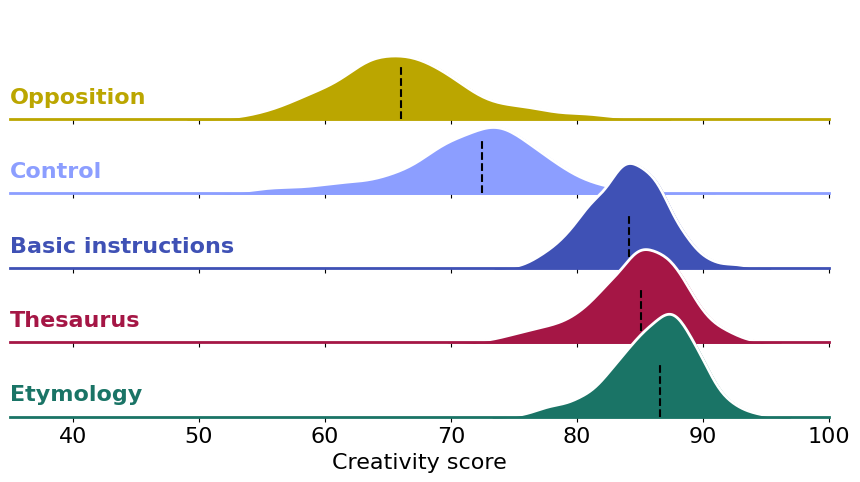

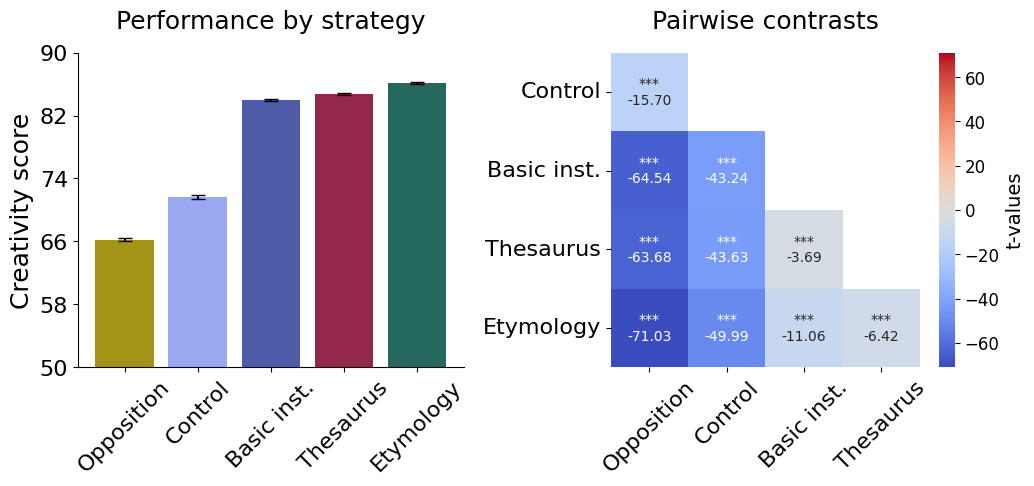

In [8]:
###PLOT STRATEGIES FOR GPT-4

gpt = "GPT-4"


df = results_df.loc[(results_df['Model'] == gpt) & (results_df['Temperature'] == 'Mid')]
df['Strategy'] = df['Strategy'].replace({'Original instructions': 'DAT'})
df = df.groupby('Strategy').apply(lambda x: x[np.abs(x['Score'] - x['Score'].mean()) <= 3 * x['Score'].std()]).reset_index(drop=True)
df = df.groupby('Strategy').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)
df = df[df['Strategy'] != 'Random']
# change strategy DAT for Basic Instructions

order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index
pal_order = get_palette(gpt, order)
df['Strategy'] = df['Strategy'].replace({'DAT': 'Basic instructions'})
order = df.groupby('Strategy')['Score'].mean().sort_values(ascending=True).index

# Initialize the FacetGrid gpt
g = sns.FacetGrid(df,row="Strategy", hue="Strategy", aspect=9,
                  height=1, palette=pal_order, row_order=order, hue_order=order)
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "Score",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# f"{label} ({len(df.loc[df['Strategy']==label])})"
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, f"{label}", fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes, fontsize=16)
g.map(label, "Score")
df['Strategy'] = df['Strategy'].replace({'Basic instructions': 'Basic inst.'})
# replace Basic instructions with Basic inst. in order list
order = [x if x != 'Basic instructions' else 'Basic inst.' for x in order]
mean_conf, pvals, tvals = analyze_results(df, 'Strategy', order=order)
for ax, model in zip(g.axes.flat, order):
      ax.axvline(mean_conf[mean_conf['Strategy'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.32)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlim=(35, 100))

for ax in g.axes.flat:
    ax.set_xlabel('Creativity score', fontsize=16)
    for label in ax.get_xticklabels():
        label.set_fontsize(16)

g.despine(bottom=True, left=True)

g.savefig('GPT4_strategy_kde_final2_.png', dpi=300)
create_heatmap(mean_conf, 'Strategy', tvals_table=tvals,
            pvals_table=pvals, order=order, pal=pal_order, color_order=pal_order, large=(10.5, 5), xlim=(50, 90),
            save='GPT4_strategy_final2.png', rotation=45, title_name='Performance by strategy', axis_name='Creativity score')


## Effect of temperature 

In [10]:
def normalize_filter_std_n(group):
    group_filtered = group[np.abs(group['Score'] - group['Score'].mean()) <= 3 * group['Score'].std()]
    return group_filtered.sample(min(len(group_filtered), 500), random_state=42)

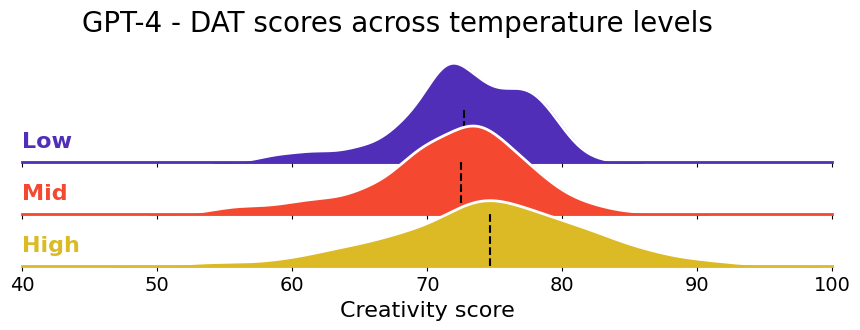

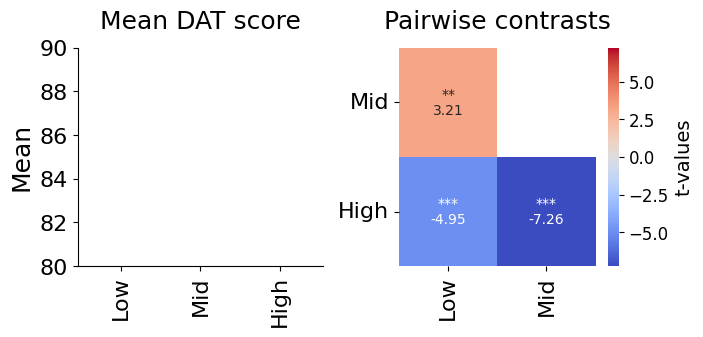

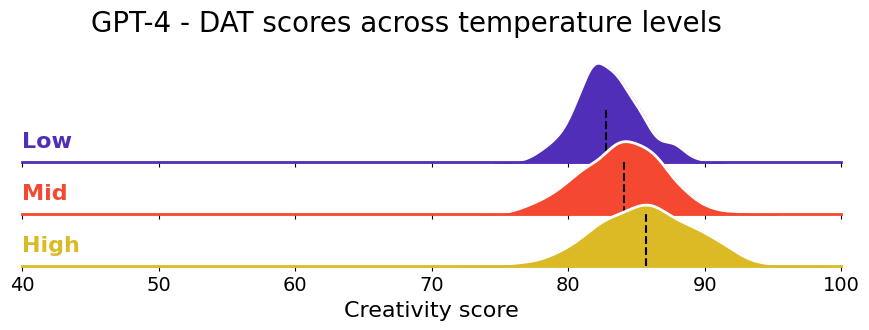

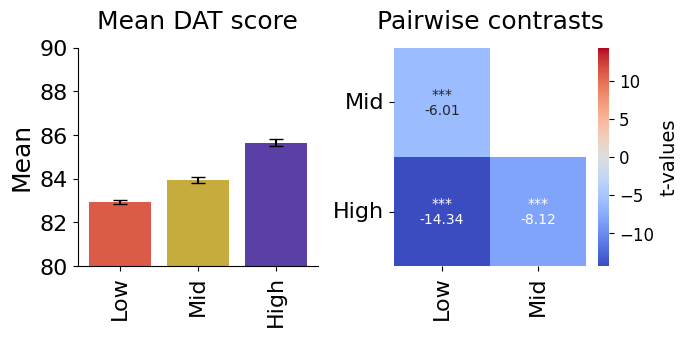

In [11]:
list_of_dfs = [results_df.loc[(results_df['Model']=='GPT-4') & 
                              (results_df['Control']=='Control')],
               results_df.loc[(results_df['Model']=='GPT-4') &
                              (results_df['Control']=='Original instructions')]]
conditions = ['Low', 'Mid', 'High']
list_of_dfs_normalized_filtered = [df.groupby('Temperature', as_index=False).apply(normalize_filter_std_n) for df in list_of_dfs]
for e, df in enumerate(list_of_dfs_normalized_filtered):
      # Initialize the FacetGrid object
      pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)
      # keep color order consistent
      g = sns.FacetGrid(df, row="Temperature", hue="Temperature", aspect=9, height=1, palette=pal, row_order=conditions, hue_order=conditions)
      for ax in g.axes.flat:
            ax.set_facecolor('none')
      # increase size of condition names
      g.set_titles(fontsize=16)
      # Draw the densities in a few steps
      g.map(sns.kdeplot, "Score",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

      def label(ax, color, label):
            txt = f"{label}"
            ax.text(0, .2, txt, fontweight="bold", color=color,
                        ha="left", va="center", transform=ax.transAxes,fontsize=16)

      # Set the subplots to overlap
      for ax, model, color in zip(g.axes.flat, ['Low', 'Mid', 'High'], [pal[0], pal[1], pal[2]]):
            ax.set_xlabel('Creativity score', fontsize=16)
            label(ax, color, model)
            for label in ax.get_xticklabels():
                  label.set_fontsize(14)
       # Add vertical lines for mean and confidence intervals
      mean_conf, pvals, tvals = analyze_results(df, 'Temperature', order=conditions)
      for ax, model in zip(g.axes.flat, ['Low', 'Mid', 'High']):
            ax.axvline(mean_conf[mean_conf['Temperature'] == model]['median'].values[0], color='black', linestyle='--', ymin=0, ymax=0.5)

      # Set the subplots to overlap
      g.figure.subplots_adjust(hspace=-.5)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(yticks=[], ylabel="")
      g.despine(bottom=True, left=True)
      g.set(xlim=(40, 100))
      
      # Set a title for the figure
      g.fig.suptitle(f"GPT-4 - {df['Control'].unique()[0]}", fontsize=20, y=1.05)
      g.fig.suptitle(f"GPT-4 - DAT scores across temperature levels", fontsize=20, y=1.05)
      
      g.savefig('GPT_DAT_temperature2_kde{}.png'.format(e), dpi=300)
      create_heatmap(mean_conf, 'Temperature', tvals_table=tvals, pvals_table=pvals, pal=[pal[1], pal[2], pal[0]], order=['Low', 'Mid', 'High'],
                     save='GPT_DAT_temperature3_{}.png'.format(e), large=(7, 3.5), xlim=(80, 90))

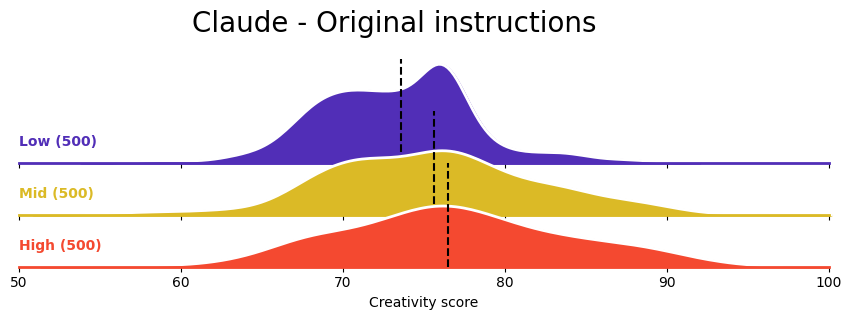

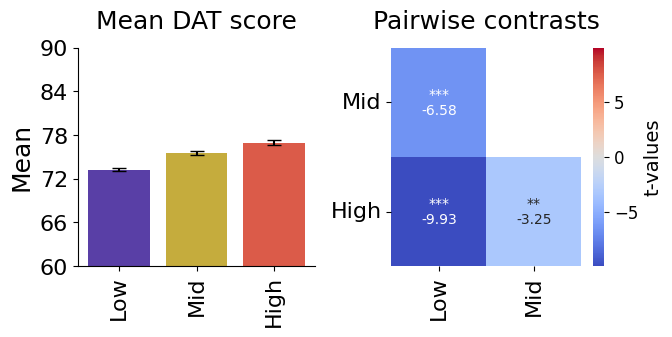

In [12]:
list_of_dfs = [results_df.loc[(results_df['Model']=='Claude') &
                              (results_df['Control']=='Original instructions')]]
conditions = ['Low', 'Mid', 'High']
list_of_dfs_normalized_filtered = [df.groupby('Temperature', as_index=False).apply(normalize_filter_std_n) for df in list_of_dfs]
for e, df in enumerate(list_of_dfs_normalized_filtered):
      # Initialize the FacetGrid object
      pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)
      # keep color order consistent
      pal = [pal[1], pal[0], pal[2]]
      g = sns.FacetGrid(df, row="Temperature", hue="Temperature", aspect=9, height=1, palette=pal, row_order=conditions)
      for ax in g.axes.flat:
            ax.set_facecolor('none')
      # Draw the densities in a few steps
      g.map(sns.kdeplot, "Score",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


      # Define and use a simple function to label the plot in axes coordinates
      def label(x, color, label):
            ax = plt.gca()
            ax.text(0, .2, f"{label} ({len(df.loc[df['Temperature']==label])})",
                    fontweight="bold", color=color,ha="left", va="center",
                    transform=ax.transAxes)
      g.map(label, "Score")
       # Add vertical lines for mean and confidence intervals
      mean_conf, pvals, tvals = analyze_results(df, 'Temperature', order=conditions)
      for ax, model in zip(g.axes.flat, ['Low', 'Mid', 'High']):
            ax.axvline(mean_conf[mean_conf['Temperature'] == model]['median'].values[0], color='black', linestyle='--')
      # Set the subplots to overlap
      g.figure.subplots_adjust(hspace=-.5)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(yticks=[], ylabel="", xlabel='Creativity score')
      g.despine(bottom=True, left=True)
      g.set(xlim=(50, 100))
      
      # Set a title for the figure
      g.fig.suptitle(f"Claude - {df['Control'].unique()[0]}", fontsize=20, y=1.05)
      g.savefig('CLAUDE_DAT_temperature2_kde{}.png'.format(e), dpi=300)
      create_heatmap(mean_conf, 'Temperature', tvals_table=tvals, pvals_table=pvals, pal=[pal[1], pal[2], pal[0]],
                     order=['Low', 'Mid', 'High'], save='CLAUDE_DAT_temperature3_{}.png'.format(e), large=(7, 3.5))

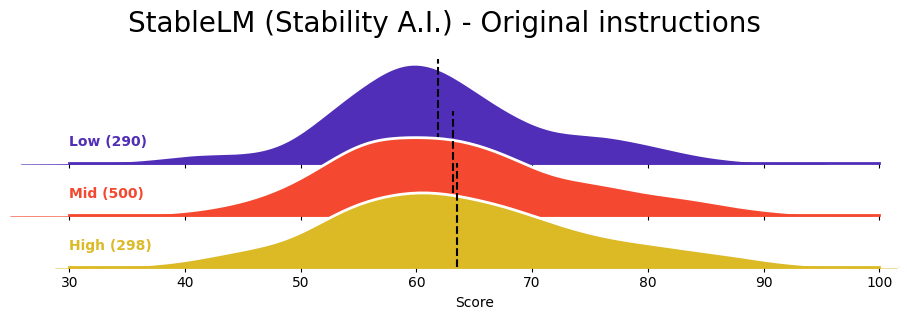

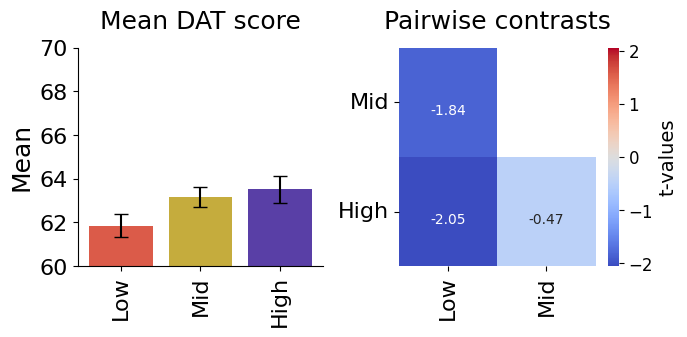

In [13]:
list_of_dfs = [results_df.loc[(results_df['Model']=='StableLM') &
                              (results_df['Control']=='Original instructions')]]
conditions = ['Low', 'Mid', 'High']
list_of_dfs_normalized_filtered = [df.groupby('Temperature', as_index=False).apply(normalize_filter_std_n) for df in list_of_dfs]
for e, df in enumerate(list_of_dfs_normalized_filtered):
      # Initialize the FacetGrid object
      pal = sns.color_palette('CMRmap',n_colors=3, desat=.9)
      # keep color order consistent
      g = sns.FacetGrid(df, row="Temperature", hue="Temperature", aspect=9, height=1, palette=pal, row_order=conditions, hue_order=conditions)
      for ax in g.axes.flat:
            ax.set_facecolor('none')
      # Draw the densities in a few steps
      g.map(sns.kdeplot, "Score",
            bw_adjust=1, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "Score", clip_on=False, color="w", lw=2, bw_adjust=1)

      # passing color=None to refline() uses the hue mapping
      g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


      # Define and use a simple function to label the plot in axes coordinates
      def label(x, color, label):
            ax = plt.gca()
            ax.text(0, .2, f"{label} ({len(df.loc[df['Temperature']==label])})",
                    fontweight="bold", color=color,ha="left", va="center",
                    transform=ax.transAxes)
      g.map(label, "Score")
       # Add vertical lines for mean and confidence intervals
      mean_conf, pvals, tvals = analyze_results(df, 'Temperature', order=conditions)
      for ax, model in zip(g.axes.flat, ['Low', 'Mid', 'High']):
            ax.axvline(mean_conf[mean_conf['Temperature'] == model]['mean'].values[0], color='black', linestyle='--')
      # Set the subplots to overlap
      g.figure.subplots_adjust(hspace=-.5)

      # Remove axes details that don't play well with overlap
      g.set_titles("")
      g.set(yticks=[], ylabel="")
      g.despine(bottom=True, left=True)
      g.set(xlim=(30, 100))
      
      # Set a title for the fgure
      g.fig.suptitle(f"StableLM (Stability A.I.) - {df['Control'].unique()[0]}", fontsize=20, y=1.05)
      g.savefig('StableLM_temperature2_kde{}.png'.format(e), dpi=300)
      create_heatmap(mean_conf, 'Temperature', tvals_table=tvals, pvals_table=pvals, pal=[pal[1], pal[2], pal[0]],
                     order=['Low', 'Mid', 'High'], save='StableLM_DAT_temperature2_{}.png'.format(e), large=(7, 3.5), xlim=(60, 70))